PREDICTING THE PROMOTION OF EMPLOYEES OF TECH PARK DATASET

In [1]:
#Import the required libraries
import pandas as pd
pd.options.display.max_columns=False
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline

In [2]:
#Import the data set
pm_data = pd.read_csv('palmertech.csv')
pm_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
#Displaying the shape of the DataFrame :
pm_data.shape

(54808, 14)

PERFORMING EDA :

In [4]:
#Displaying the info of the dataframe :
pm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


We can see that there are missing values in the `previous_year_rating` and `education` columns. For the first iteration, we will drop the missing values as they constitute only about

In [5]:
pm_data.dropna(inplace=True)

In [6]:
#Describing the dataframe :
pm_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,48660.000000,48660.000000,48660.000000,48660.000000,48660.00000,48660.000000,48660.00000,48660.000000,48660.000000
mean,39169.271681,1.251993,35.589437,3.337526,6.31157,0.356473,0.02314,63.603309,0.086971
std,22630.461554,0.604994,7.534571,1.257922,4.20476,0.478962,0.15035,13.273502,0.281795
min,1.000000,1.000000,20.000000,1.000000,1.00000,0.000000,0.00000,39.000000,0.000000
25%,19563.500000,1.000000,30.000000,3.000000,3.00000,0.000000,0.00000,51.000000,0.000000
50%,39154.000000,1.000000,34.000000,3.000000,5.00000,0.000000,0.00000,60.000000,0.000000
75%,58788.250000,1.000000,39.000000,4.000000,8.00000,1.000000,0.00000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.00000,1.000000,1.00000,99.000000,1.000000


You can see that only the `age`,`no_of_trainings`,`length_of_service` columns contain <b>continuous</b> values. Let us see these columns in more detail.

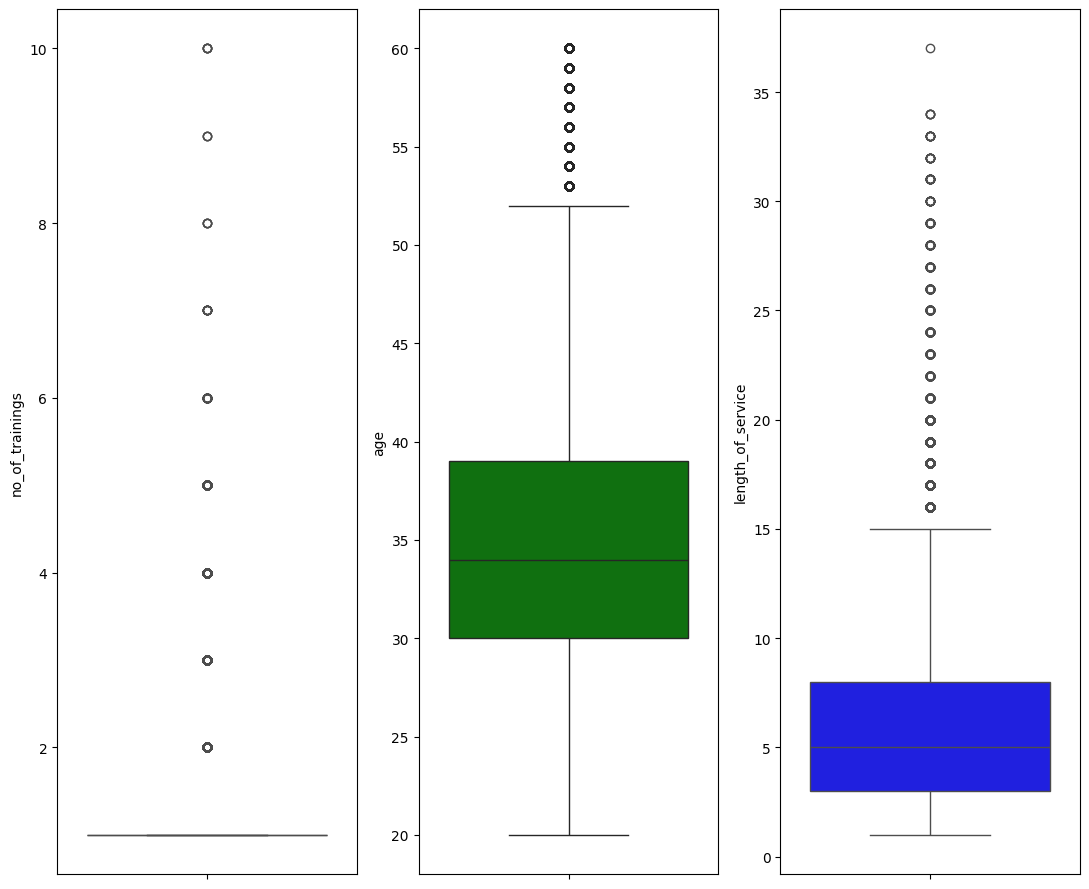

In [7]:
#Checking the box plot of the first 6 columns
plt.figure(figsize=[11,9])
plt.subplot(131)
sns.boxplot(pm_data.iloc[:,6],color='r')
plt.subplot(132)
sns.boxplot(pm_data.iloc[:,7],color='g')
plt.subplot(133)
sns.boxplot(pm_data.iloc[:,9],color='b')
plt.tight_layout()
plt.show()

<ipython-input-8-cb9a131bcb84>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pm_data['age'])


<Axes: xlabel='age', ylabel='Density'>

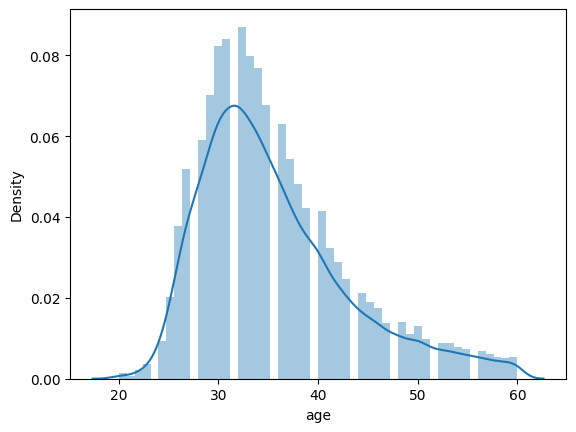

In [8]:
#Visualizing using distplot :

sns.distplot(pm_data['age'])

<ipython-input-9-aded995d8bce>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pm_data['length_of_service'])


<Axes: xlabel='length_of_service', ylabel='Density'>

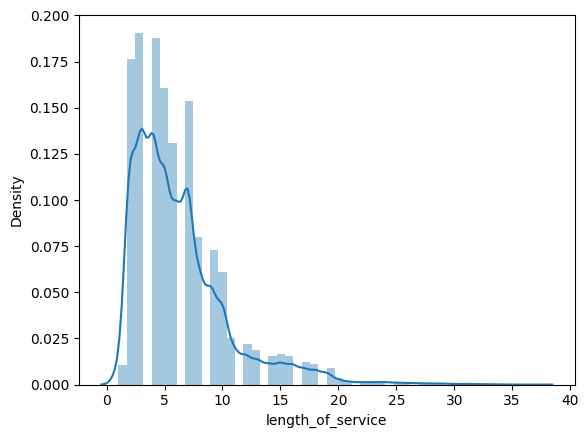

In [9]:
sns.distplot(pm_data['length_of_service'])

`age` seems to be following a perfect <b>normal distribution</b> whereas `length_of_service` seems to have a skewed distribution. Let us normalize both these columns by using

In [10]:
pm_data_norm = pm_data[['age','length_of_service']]

In [11]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(pm_data_norm)

In [12]:
X_std

array([[-0.07823179,  0.40155619],
       [-0.74184639, -0.54975648],
       [-0.21095471,  0.16372803],
       ...,
       [ 0.18721405, -0.07410014],
       [-1.14001516, -0.78758464],
       [-1.14001516, -0.31192831]])

In [13]:
fdf_normalized = pd.DataFrame(data=X_std, index=pm_data_norm.index, columns=pm_data_norm.columns)

Let us now analyze <b>Categorical</b> columns

Convert the `is_promoted` column to a <b>categorical</b> column

In [14]:
pm_data['is_promoted'] = pd.Categorical(pm_data['is_promoted']).codes

<Axes: xlabel='is_promoted', ylabel='count'>

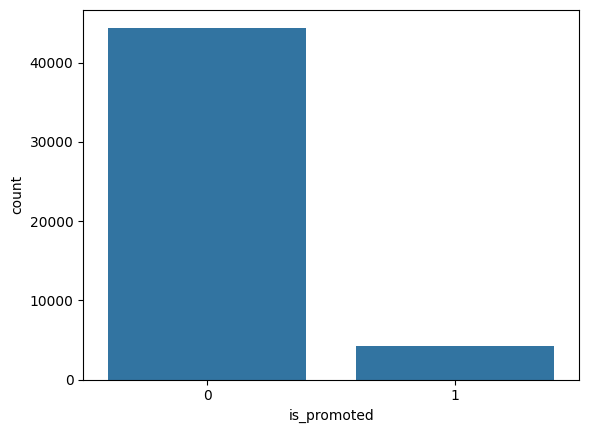

In [15]:
#Data Visualization :
sns.countplot(x='is_promoted',data=pm_data)

We are dealing with imbalanced datset.

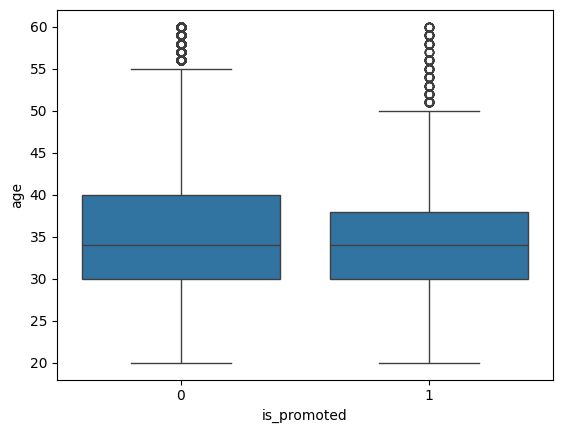

In [16]:
#Relation between Age and Promotion
sns.boxplot(x='is_promoted', y='age', data=pm_data)
plt.show()

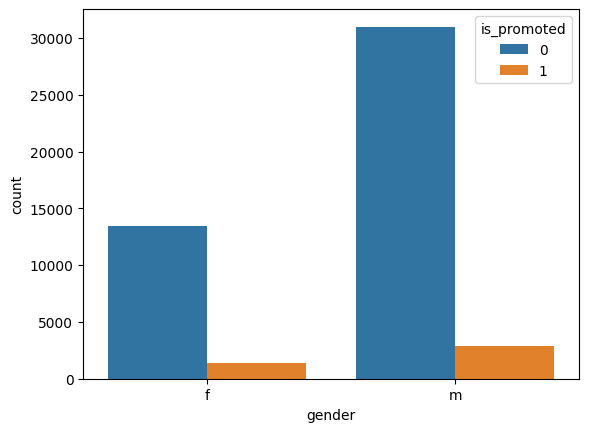

In [17]:
#Gender analysis
sns.countplot(x='gender', data=pm_data, hue='is_promoted')
plt.show()

Observation: You can see that there are more <b>male</b> employees than female employees in the dataset. Also the proportion of employees promoted seems to be more or less the <b>same</b> across both the genders.

<Axes: xlabel='education', ylabel='count'>

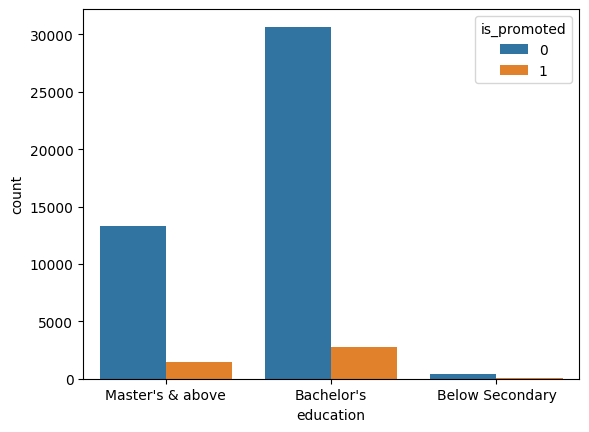

In [18]:
#Education analysis
sns.countplot(x='education',data=pm_data,hue='is_promoted')

<b>Observation:</b> People with <b>Below Secondary</b> education have not been promoted

FEATURE ENGINEERING :

In [19]:
#convert categorical columns to dummy variables :
cols=['department','education','gender','recruitment_channel']                                                      # These are the categorical columns
cat_cols=pm_data[cols]
cat_cols=cat_cols.astype(str)
cat_cols.head()

,department,education,gender,recruitment_channel
0,Sales & Marketing,Master's & above,f,sourcing
1,Operations,Bachelor's,m,other
2,Sales & Marketing,Bachelor's,m,sourcing
3,Sales & Marketing,Bachelor's,m,other
4,Technology,Bachelor's,m,other


In [20]:
dummies=pd.get_dummies(cat_cols,drop_first=True)
dummies.head()

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,1,0,0


In [21]:
#Combining dummy variables with original data :
input_features=pd.concat([pm_data,dummies],axis=1)

In [22]:
#Dropping origianl categorical column :
input_features.drop(cols, axis=1, inplace=True)

In [23]:
input_features.drop(['age','length_of_service'], axis=1, inplace=True)

In [24]:
#Combine the dataset with the normalized values of `age` and `length_of_service` columns:

input_features = pd.concat([input_features, fdf_normalized],axis=1)

In [25]:
#Defining the X and Y :

y=input_features.loc[:,'is_promoted']
input_features.drop(['is_promoted','region','employee_id'],axis=1,inplace=True)
X=input_features

In [26]:
#Train test split function :

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234,stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(34062, 20)
(14598, 20)
(34062,)
(14598,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7220852171530346
********************************************
Confusion matrix


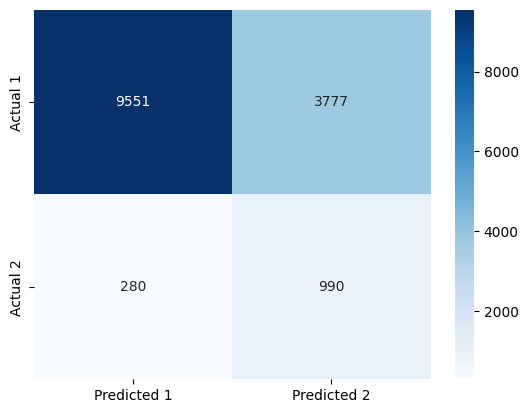

**********************************************
              precision    recall  f1-score   support

           0       0.97      0.72      0.82     13328
           1       0.21      0.78      0.33      1270

    accuracy                           0.72     14598
   macro avg       0.59      0.75      0.58     14598
weighted avg       0.91      0.72      0.78     14598



In [27]:
#Logistic regression model :

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=101,class_weight='balanced')
lr_model=lr.fit(x_train,y_train)
lr_pred=lr_model.predict(x_test)
print(metrics.accuracy_score(y_test,lr_pred))
print('********************************************')
print('Confusion matrix')
lr_cfm=metrics.confusion_matrix(y_test, lr_pred)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(lr_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

print('**********************************************')
print(metrics.classification_report(y_test,lr_pred))

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


0.9305384299219072
*******************************************
Confusion matrix


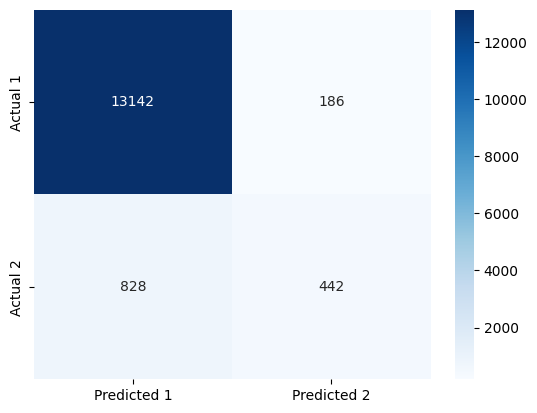

********************************************
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     13328
           1       0.70      0.35      0.47      1270

    accuracy                           0.93     14598
   macro avg       0.82      0.67      0.71     14598
weighted avg       0.92      0.93      0.92     14598



In [28]:
#Random forest model :

from sklearn.ensemble import RandomForestClassifier
random_grid = {'n_estimators': range(5,20,3),
              'max_features' : ['auto', 'sqrt'],
              'max_depth' : [5,10,20,30],
              'min_samples_split':[2,5,10],
              'criterion':['entropy'],
              'min_samples_leaf':[1,2,4]}

rf=RandomForestClassifier(oob_score=True,class_weight='balanced')
rf_gs = GridSearchCV(rf, random_grid, cv = 5, n_jobs=-1, verbose=2)

rf_gs.fit(x_train, y_train)
y_pred = rf_gs.predict(x_test)

print(metrics.accuracy_score(y_test,y_pred))
print('*******************************************')
print('Confusion matrix')
rf_cfm=metrics.confusion_matrix(y_test, y_pred)

lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(rf_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

print('********************************************')
print(metrics.classification_report(y_test,y_pred))


In [29]:
# Actual Values of y_test :

print (y_test.value_counts())
print ("Null Accuracy:",y_test.value_counts().head(1) / len(y_test))

0    13328
1     1270
Name: is_promoted, dtype: int64
Null Accuracy: 0    0.913002
Name: is_promoted, dtype: float64


<b>Null accuracy</b> itself is close to 0.91. So our accuracy of 0.92 is not a big deal. Also, as discussed earlier, f1-score is more important in these scenarios. But even that is pretty low. By the way, is <b>f1-score</b> still the right metric in this scenario?

For imbalanced datasets, <b>ROC_AUC</b> is considered to be a more relevant metric than <b>f1-score and accuracy<b> as it is independent of threshold value.

In [30]:
from sklearn.metrics import roc_auc_score
predict_probabilities = rf_gs.predict_proba(x_test)
final_metric = roc_auc_score(y_test, predict_probabilities[:,1])
print (final_metric)

0.8452232172396519


0.940539799972599
************
Confusion matrix


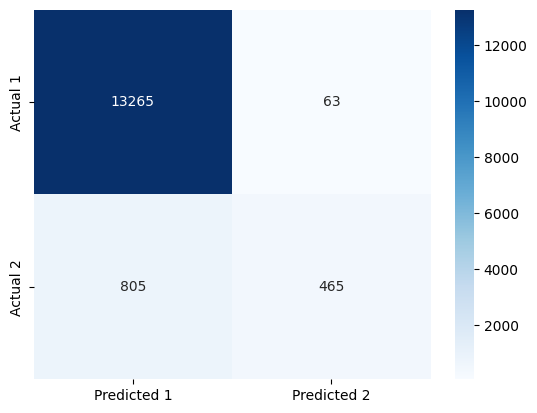

************
 Classification report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13328
           1       0.88      0.37      0.52      1270

    accuracy                           0.94     14598
   macro avg       0.91      0.68      0.74     14598
weighted avg       0.94      0.94      0.93     14598



In [34]:
#XGBoost Classifier :

from xgboost.sklearn import XGBClassifier
xgb_model = XGBClassifier(num_class = 1,
                           objective="binary:logistic",
                           eval_metric="logloss",
                           seed=42)
xgb_model.fit(x_train, y_train)
xgboost_pred=xgb_model.predict(x_test)
print(metrics.accuracy_score(y_test,xgboost_pred))
print('************')
print('Confusion matrix')
xgboost_cm=metrics.confusion_matrix(y_test, xgboost_pred)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(xgboost_cm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)

plt.show()

print('************\n Classification report')
print(metrics.classification_report(y_test,xgboost_pred))

In [35]:
predict_probabilities = xgb_model.predict_proba(x_test)
from sklearn.metrics import roc_auc_score
final_metric = roc_auc_score(y_test, predict_probabilities[:,1])
print (final_metric)

0.9064236915238536


Hurray! <b>Xgboost</b> gave us a higher ROC_AUC score compared to Random Forest. Let us see if we can make this better by tuning the real strengths of Xgboost - its <b>Hyperparameters.</b>

In [38]:
#XGBoost with GridSearch :

xgb_gs_clf = XGBClassifier(num_class = 1,
                           objective="binary:logistic",
                           eval_metric="logloss",
                           seed=42)

param_grid = {"max_depth": [10,15,20],
              "n_estimators": range(5,20,5) ,
              "gamma": [0.03,0.05],
              "learning_rate": [0.01,0.05]}


grid_search = GridSearchCV(xgb_gs_clf,
                           param_grid=param_grid,
                           cv = 5,
                           n_jobs=-1,
                           scoring='neg_log_loss',
                           verbose=2)
grid_search.fit(x_train,y_train)
grid_search.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'gamma': 0.05, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 15}

0.9355391149472531
*************************************************
Confusion matrix


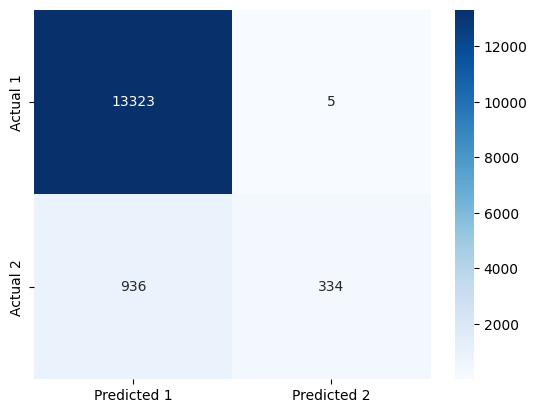

***************************************************
 Classification report
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     13328
           1       0.99      0.26      0.42      1270

    accuracy                           0.94     14598
   macro avg       0.96      0.63      0.69     14598
weighted avg       0.94      0.94      0.92     14598



In [39]:
xgboost_y_pred=grid_search.predict(x_test)
print(metrics.accuracy_score(y_test,xgboost_y_pred))
print('*************************************************')
print('Confusion matrix')
xgboost_cfm=metrics.confusion_matrix(y_test, xgboost_y_pred)


lbl1=["Predicted 1", "Predicted 2"]
lbl2=["Actual 1", "Actual 2"]

sns.heatmap(xgboost_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)

plt.show()

print('***************************************************\n Classification report')
print(metrics.classification_report(y_test,xgboost_y_pred))

In [40]:
predict_probabilities = grid_search.predict_proba(x_test)
final_metric = roc_auc_score(y_test, predict_probabilities[:,1])
print (final_metric)

0.9006472963201029


Not much of an improvement over the earlier Xgboost model. Try out with <b>more hyperparameter combinations</b> and you will surely see a jump in the roc_auc value.